In [57]:
# Importação do módulo criado
import sys
sys.path.append("../")
from src import *

# Iris Dataset

In [58]:
df = load_dataframe("../data/processed/preprocessed_iris.csv") # Carregando o dataframe

Dataframe carregado com sucesso.


In [59]:
real_labels = df["Species"] # Salvando as labels reais
df = df.drop(columns=["Id", "Species"]) # Removendo colunas desnecessárias

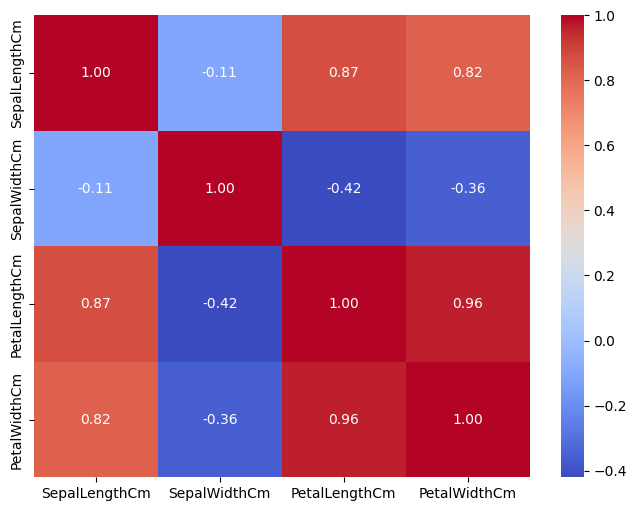

In [60]:
plot_correlations(df) # Plotando a matriz de correlação

In [64]:
df = df.drop(columns=["PetalWidthCm"]) # Removendo a coluna com maior correlação

In [65]:
X = data_scale(df, scaler_method="Standard") # Normalizando os dados

Valores dimensionados utilizando o método Standard.


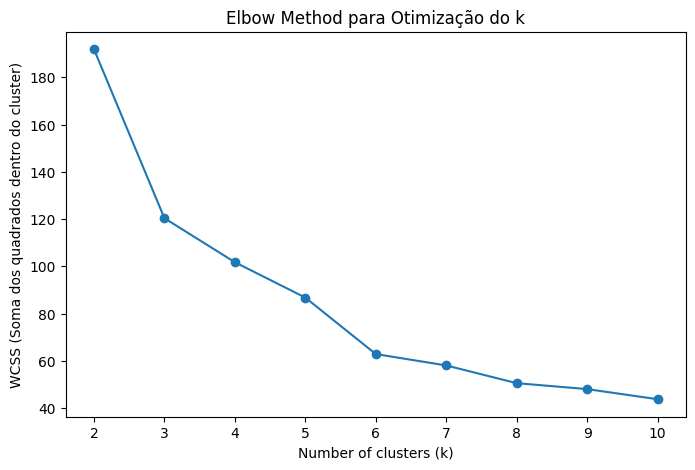

In [66]:
plot_elbow(X, 10) # Plotando o método do cotovelo

In [67]:
find_best_k(X, 2, 10) # Apesar de 2 ser o melhor silhouette score, sabemos a classificação real em que 3 classes existem

Melhor score:0.5502848271359433 com 2 clusters.


In [68]:
model, label, centroids = clusterize(X, 3) # Clusterizando os dados

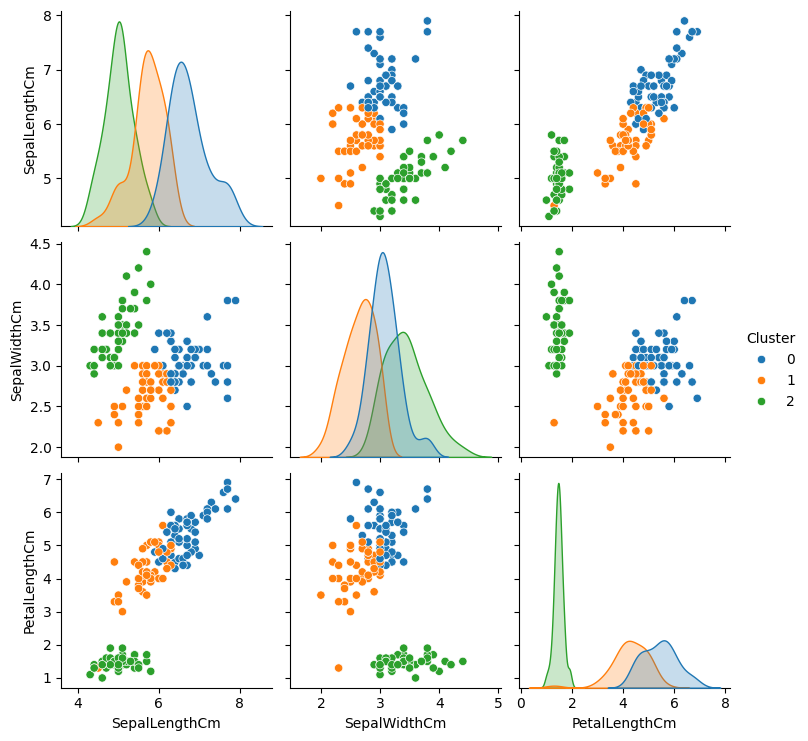

In [69]:
pairplot(df, model.labels_) # Plotando o pairplot

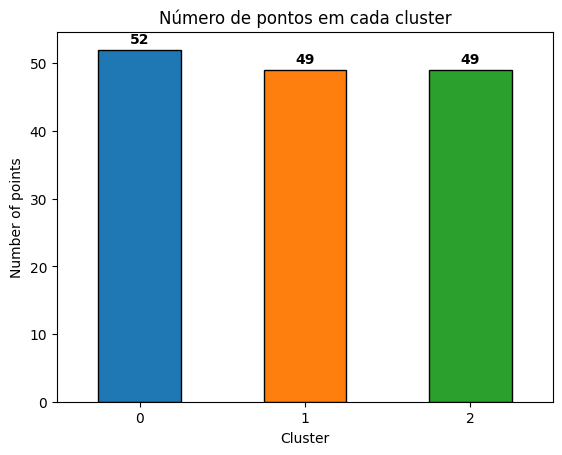

In [70]:
plot_cluster_count(model.labels_) # Plotando a contagem de clusters

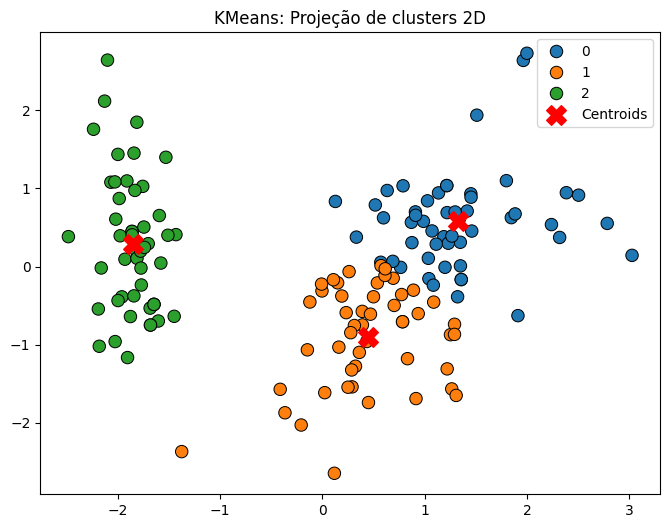

In [71]:
plot_clusters(X, model.labels_, centroids) # Plotando os clusters

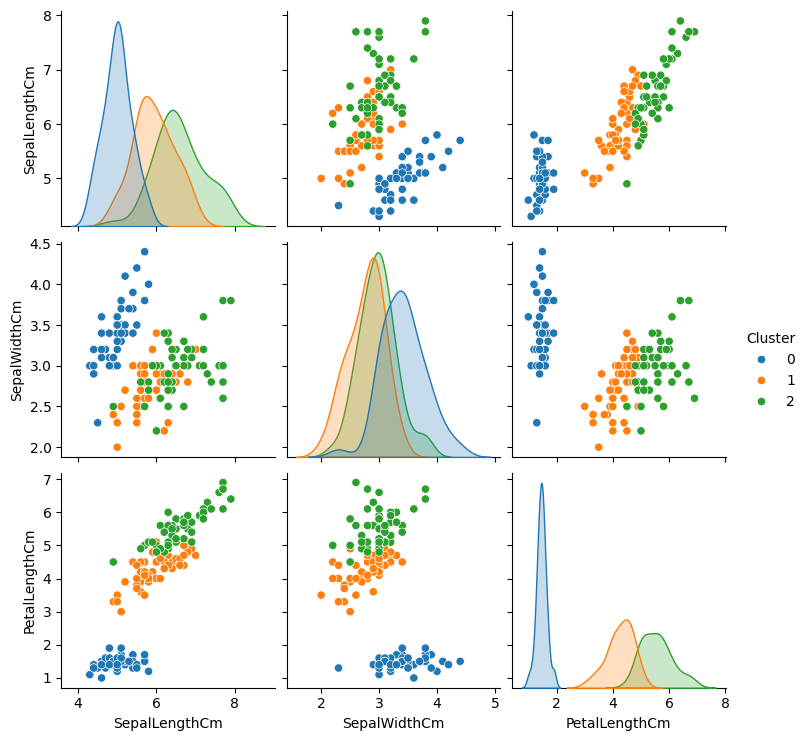

In [72]:
pairplot(df, real_labels) # Plotando o pairplot com as labels reais

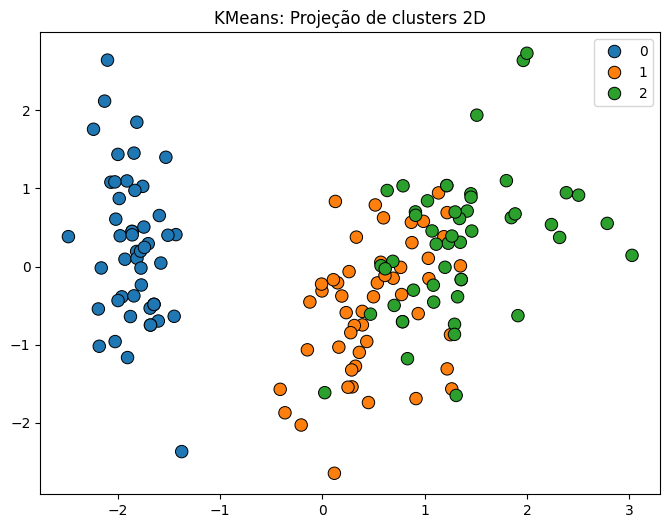

In [73]:
plot_clusters(X, real_labels) # Plotando os clusters com as labels reais

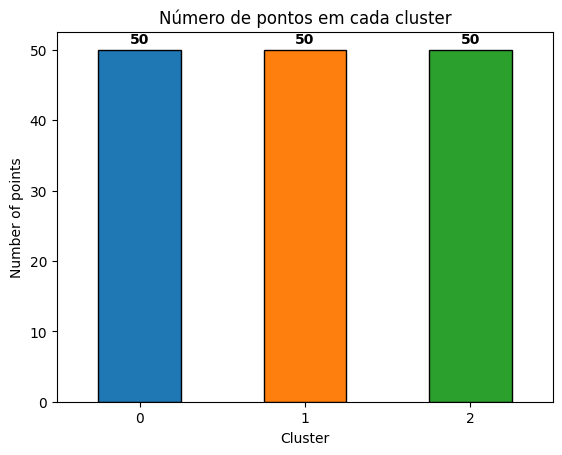

In [74]:
plot_cluster_count(real_labels) # Plotando a contagem de clusters com as labels reais

## Insights:

Ao comparar os resultados, percebemos que apesar de a quantidade de cada classe ser praticamente a correta e real das classes originais, a clusterização somente conseguiu definir uma classe corretamente. Sendo esta a de Iris-setosa. As classes Iris-versicolor e Iris-virginica estão claramente misturadas.

# Mall Customers Dataset

In [75]:
df = load_dataframe("../data/processed/preprocessed_mall_customers.csv") # Carregando o dataframe
df = df.drop(columns=["CustomerID", "Gender"]) # Removendo colunas desnecessárias

Dataframe carregado com sucesso.


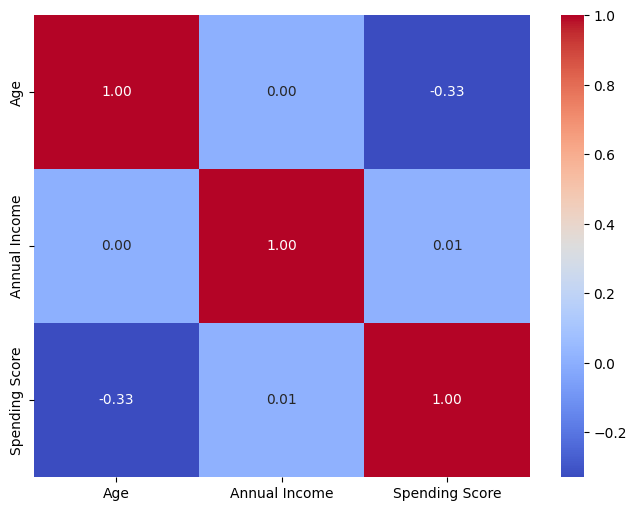

In [76]:
plot_correlations(df) # Plotando a matriz de correlação

In [49]:
X = data_scale(df) # Normalizando os dados

Valores dimensionados utilizando o método MinMax.


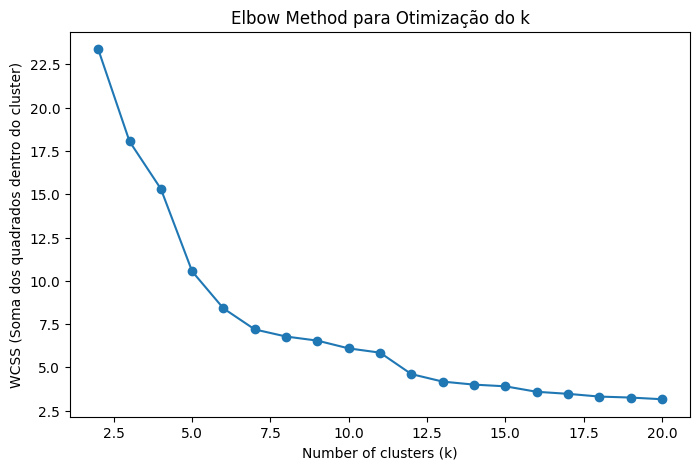

In [56]:
plot_elbow(X, max_k=20) # Plotando o gráfico do método do cotovelo

In [51]:
find_best_k(X, max_k=50) # Encontrando o melhor valor de k

Melhor score:0.42918876171699133 com 6 clusters.


In [52]:
model, labels, centroids = clusterize(X, num_of_clusters=6) # Clusterizando os dados com k=6

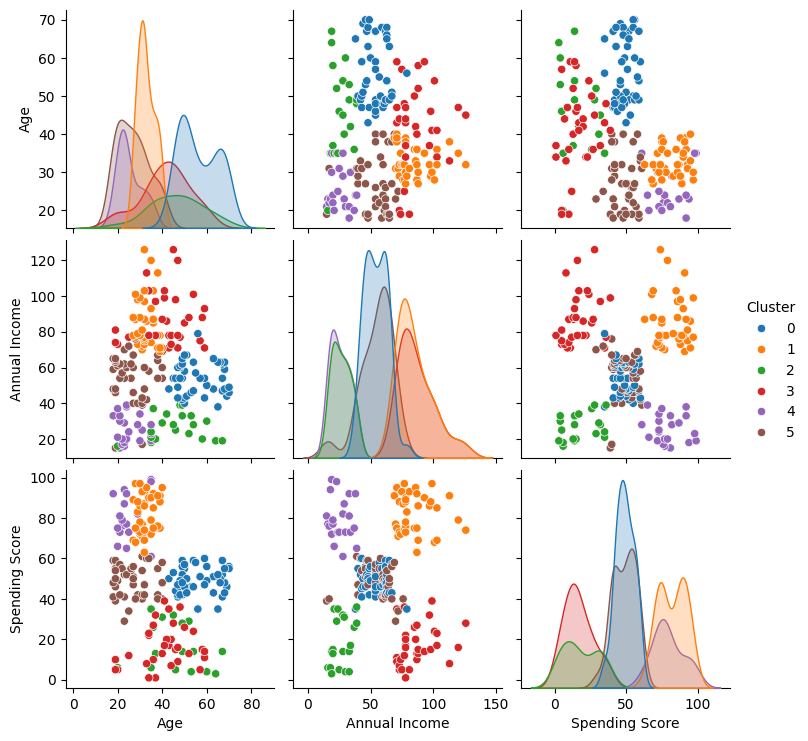

In [53]:
pairplot(df, model.labels_) # Plotando o pairplot

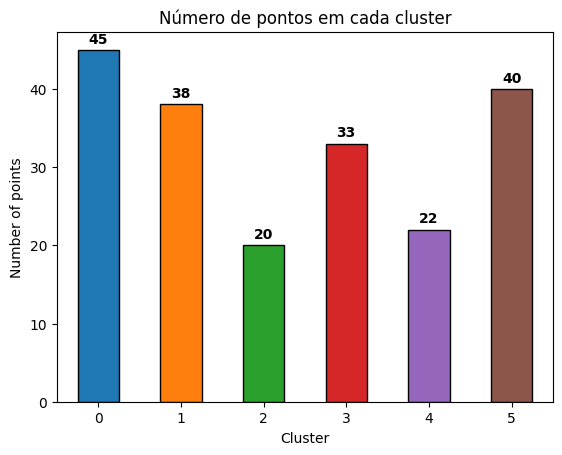

In [54]:
plot_cluster_count(model.labels_) # Plotando a contagem de clusters

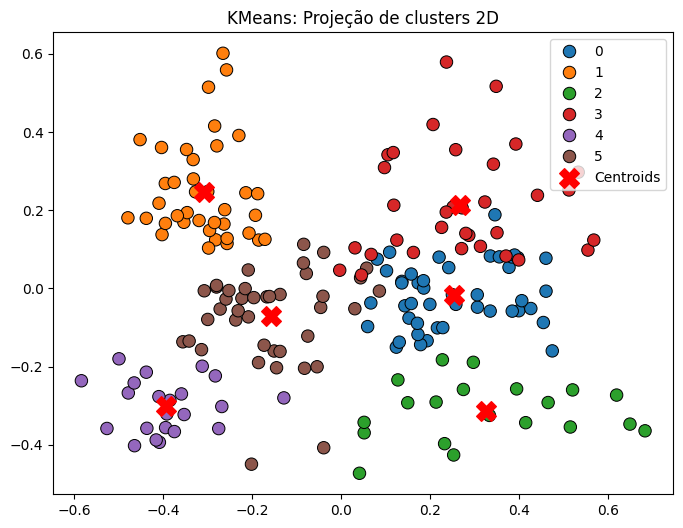

In [ ]:
plot_clusters(X, model.labels_, centroids=centroids) # Plotando os clusters

## Insights:
- Grupo 0: Grupo mais frequente, com 42 pontos, pessoas de idade moderada, com ganho médio e gastam o médio
- Grupo 1: Pessoas jovens com ganho alto e gastos altos, 38 pontos
- Grupo 2: Pessoas com idades moderadas, com ganho baixo e gastos baixos mas inclinados para médio.
- Grupo 3: Pessoas de todas as idades, com ganho alto, mas que economizam, ou seja, gastos baixos.
- Grupo 4: Pessoas jovens com ganho baixo mas que gastam muito.
- Grupo 5: Pessoas jovens que ganham medio e gastam médio.

# Wholesome Customers Dataset

In [10]:
df = load_dataframe("../data/processed/preprocessed_wholesome_customers.csv") # Carregando o dataframe

Dataframe carregado com sucesso.


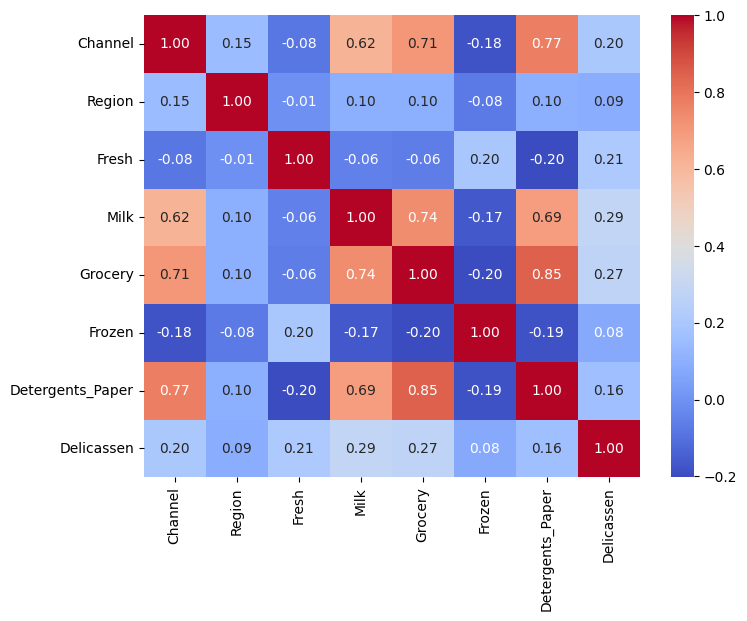

In [11]:
plot_correlations(df) # Plotando a matriz de correlação

In [24]:
df = df.drop(columns=["Channel", "Region", "Grocery"]) # Removendo colunas desnecessárias

In [25]:
X = data_scale(df, scaler_method="Standard") # Normalizando os dados com StandardScaler

Valores dimensionados utilizando o método Standard.


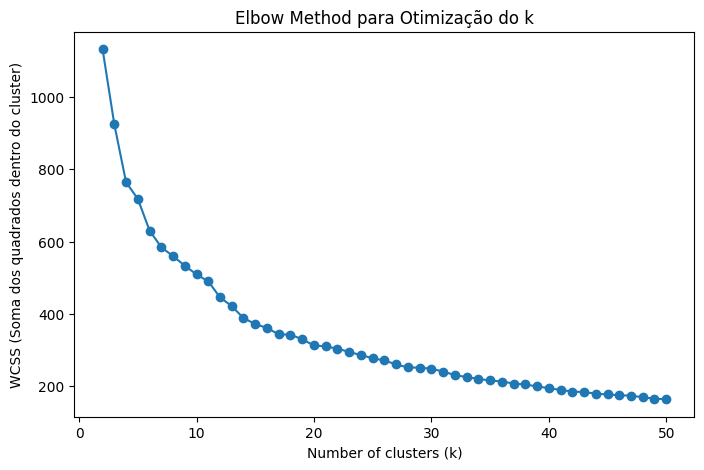

In [26]:
plot_elbow(X, 50) # Plotando o gráfico do método do cotovelo

In [33]:
find_best_k(X, start_k=2, max_k=30) # Encontrando o melhor valor de k de acordo com o silhouette score

Melhor score:0.3210159586069119 com 2 clusters.


In [36]:
model, labels, centroids = clusterize(X, 5) # Clusterizando os dados com k=5 (definido pelo método do cotovelo)

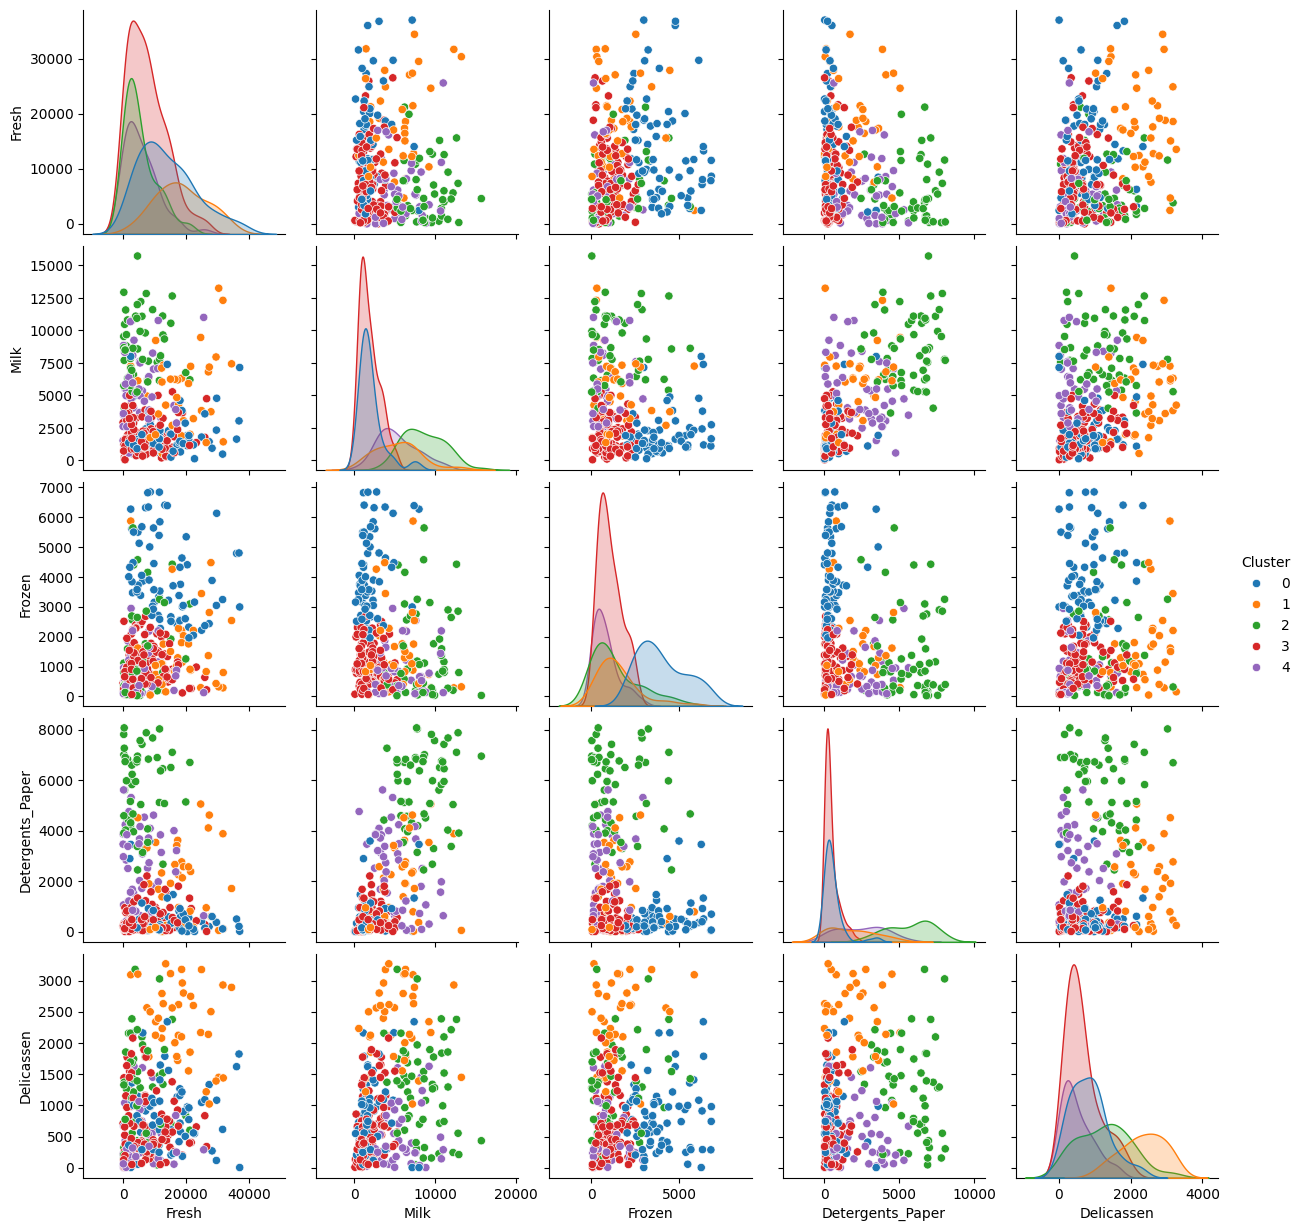

In [ ]:
pairplot(df, model.labels_) # Plotando o pairplot

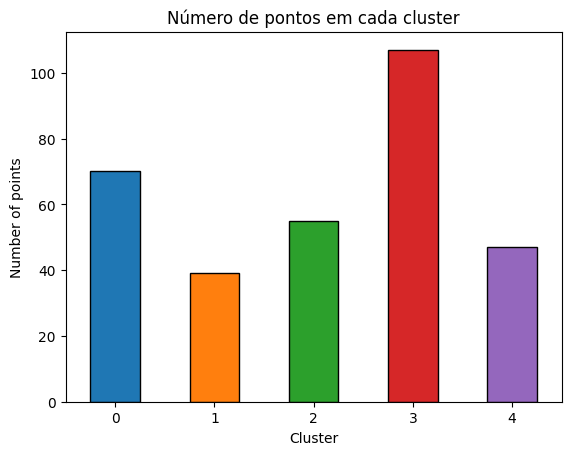

In [38]:
plot_cluster_count(model.labels_) # Plotando o gráfico de contagem de clusters

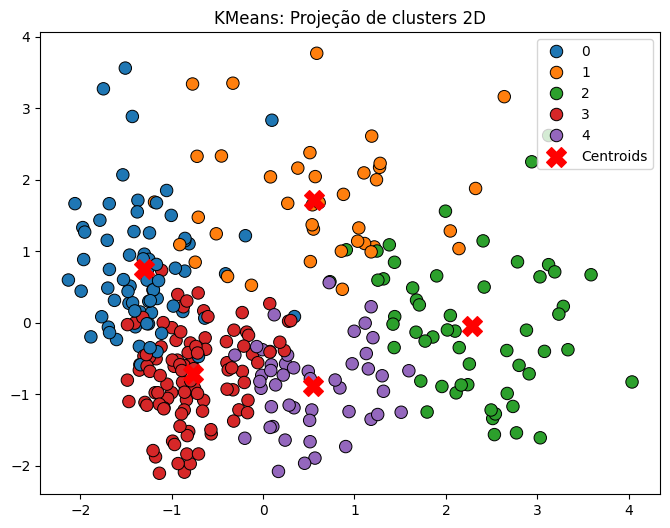

In [39]:
plot_clusters(X, model.labels_, centroids=centroids) # Plotando os clusters

In [44]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               verbose=0,
               random_state=42,
               copy_x=True,
               algorithm='elkan')

model.fit(df)

KMeans(algorithm='elkan', n_clusters=5, n_init=10, random_state=42)

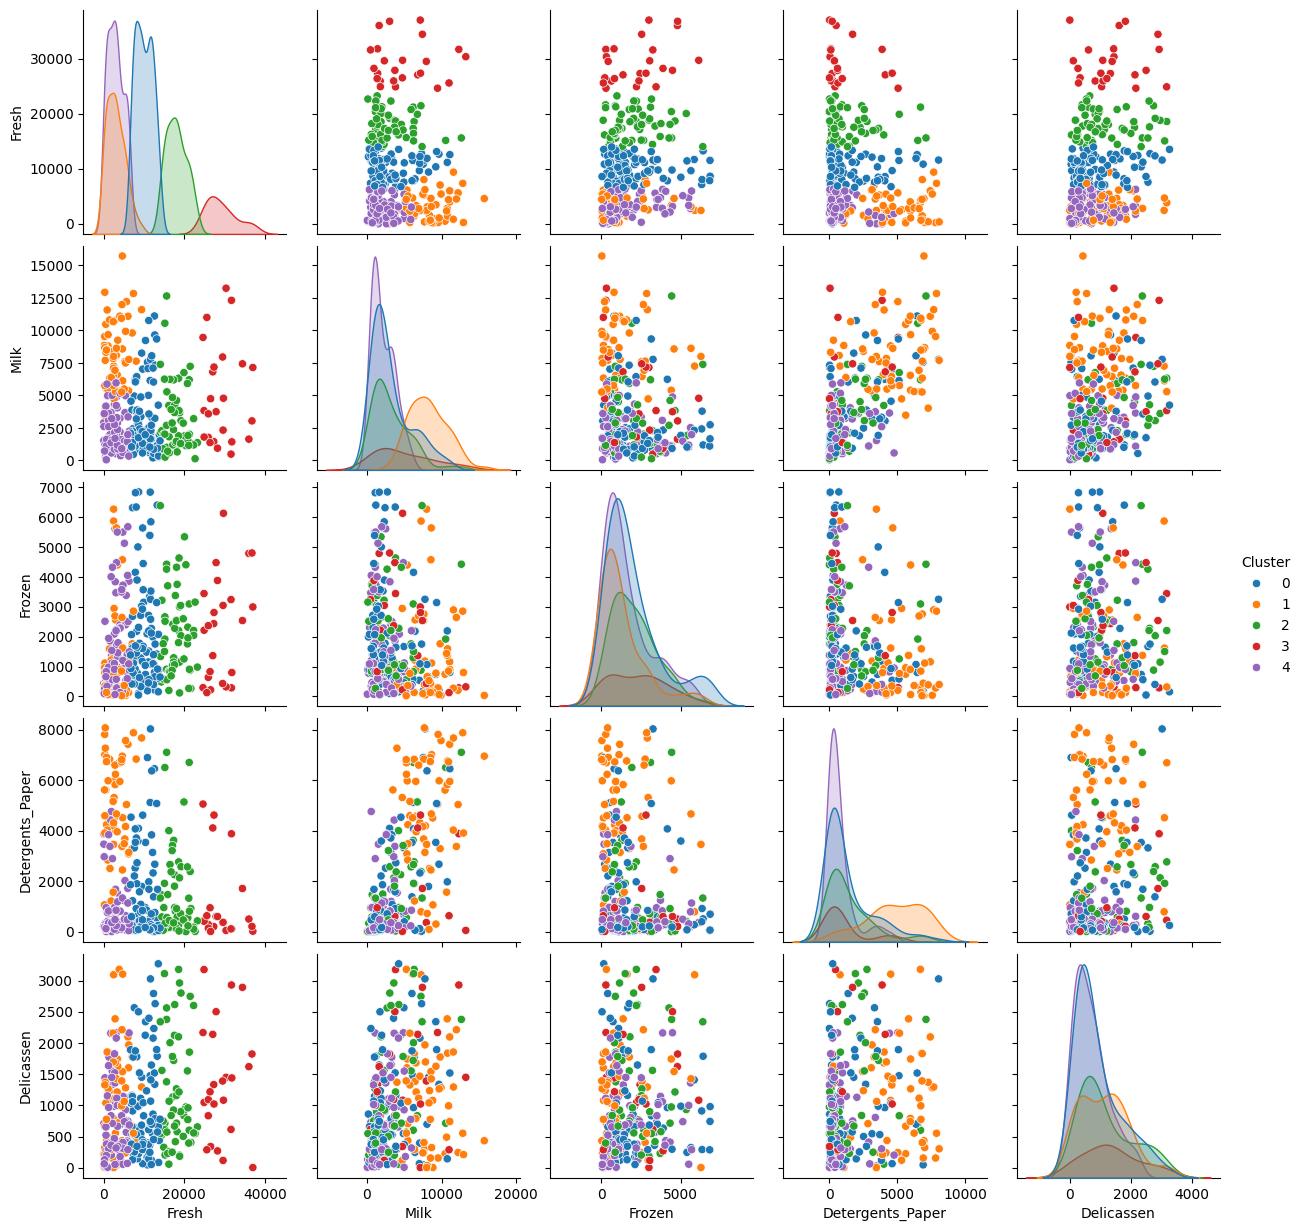

In [45]:
pairplot(df, model.labels_) # Plotando o pairplot